# Setting Up

In [49]:
#import necessary packages/libraries
library(tidytext)
library(tidyverse)
library(wordcloud)
library(topicmodels)

Warning message:
"package 'topicmodels' was built under R version 3.6.3"

In [4]:
#load airbnb reviews data in
airbnb_data = read_csv("airbnb_reviews.csv")

Parsed with column specification:
cols(
  id = col_double(),
  comments = col_character()
)


In [5]:
head(airbnb_data)

id,comments
1,"My daughter and I had a wonderful stay with Maura. She kept in close touch with us throughout the day as we weren't arriving til later in the evening. The room was charming and the whole apartment was very warm and eclectic. She asked us what time we'd like breakfast and laid out a very nice spread. Right down the street from Jamaica Pond and very close to Center St. as well. All in all, great experience!"
2,"We stay at Elizabeth's place for 3 nights in October 2014. The apartment is really a great place to stay. Lovely decorated and extremely well located. Very close to Back Bay station if you come by train, and close also to the subway and just a nice walk from the city center. I would say that is better that what you appreciate in the pictures Also the bed is very confortable. So really it was an optimal choice for us."
3,"If you're staying in South Boston, this is a terrific place to camp out. The apartment and bedroom are lovely, Ellie is an excellent host, and there is a lot within walking distance in a neighborhood on the rise."
4,"Derian and Brian were great and prompt with their communications with us. The room was as described; it was a small nice and clean room with a very comfortable bed and pillows. We shared a bathroom with others in the apartment. Derian had turned on the AC in our room prior to our arrival which we appreciated a lot. He also greeted us kindly when we arrived and showed us around. We arrived late and left early in the morning to catch our flight, so unfortunately, we did not get a chance to meet Brian or to talk much with Derian."
5,John and Dan were gracious hosts and the location and accommodations were very nice......as listed.
6,"The best thing about Sean's place is the location. It's by a T station, there are a number of groceries and restaurants around, etc. It was nice to see all the drawings he made while studying architecture. The building is a bit old so walls are a bit thinner but overall it was a nice place to be. Sean was great in answering phone calls and questions. He was there to meet us when we got to the place."


In [6]:
#tokenize data; convert review data into bag of words
airbnb_reviews = airbnb_data %>% unnest_tokens(word, comments)

# Objective 1
**What are the 10 most frequent words after filtering out stop_words?**

After tokenizing and filtering out the stop words, it appears that the 10 most frequent words in the airbnb reviews are as what follows: "stay","boston","apartment","location","clean","nice","host","comfortable","house", and "recommend".

In [7]:
#remove stop words from bag of words
clean_airbnb_reviews = airbnb_reviews %>% anti_join(stop_words)

Joining, by = "word"


In [8]:
#check word frequencies, then return the 10 most frequent words
#arranged in descending order (most frequent at the top)
#store as top10words
top10words = clean_airbnb_reviews %>% count(word) %>% top_n(10, n) %>% arrange(desc(n))
top10words

word,n
stay,601
boston,535
apartment,463
location,364
clean,346
nice,314
host,293
comfortable,237
house,221
recommend,218


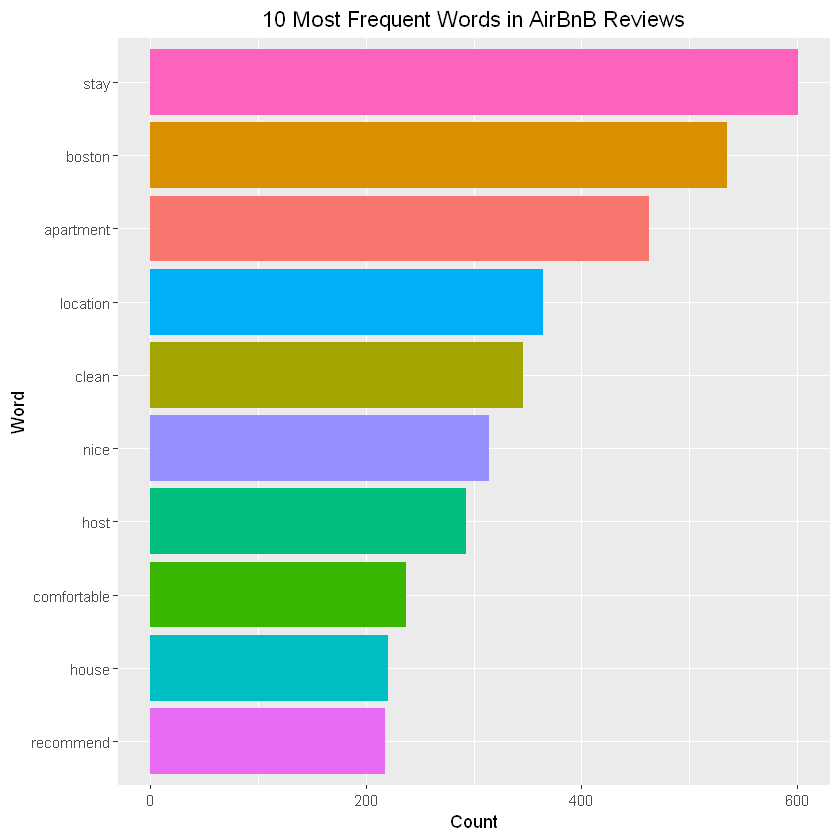

In [9]:
#center-align the title
theme_update(plot.title = element_text(hjust = 0.5))

#create a barplot to illustrate top 10 words
#reorder words so the bars appear in descending order by frequency
ggplot(top10words,aes(x=fct_reorder(word, n), y=n, fill=word))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    labs(title="10 Most Frequent Words in AirBnB Reviews", y="Count", x="Word")
    

# Objective 2
**What are the 10 most frequent bigrams (ones that don't contain stop words within them)?**



After tokenization and filtering out non-bigrams and bigrams with stop words, it appears that the 10 most frequent bigrams in the airbnb reviews are as what follows: "highly recommend", "walking distance","minute walk", "short walk", "aa", "public transportation", "easy access", "downtown boston", "recommend staying", and "beacon hill".

In [10]:
#tokenize airbnb reviews, filter to only keep bigrams
airbnbreviews_bigram = airbnb_data %>% unnest_tokens(word, comments, token="ngrams", n=2)

In [11]:
#preliminary look at subset
airbnbreviews_bigram

id,word
1,my daughter
1,daughter and
1,and i
1,i had
1,had a
1,a wonderful
1,wonderful stay
1,stay with
1,with maura
1,maura she


In [12]:
#tokenize reviews; only keep bigrams that don't contain filler/stop words
cleaned_airbnbreviews_bigram = airbnbreviews_bigram %>%
    separate(word, into = c("word1", "word2"), sep = " ") %>%
    filter( !(word1 %in% stop_words$word) & !(word2 %in% stop_words$word) ) %>%
    unite(word, c(word1, word2), sep = " ")

In [13]:
#look at output after filtering
cleaned_airbnbreviews_bigram

id,word
1,wonderful stay
1,close touch
1,arriving til
1,nice spread
1,jamaica pond
1,center st
2,3 nights
2,october 2014
2,stay lovely
2,lovely decorated


In [14]:
#check word frequencies, then return the 10 most frequent bigrams
#arranged in descending order (most frequent at the top)
#store as top10words
top10bigrams = cleaned_airbnbreviews_bigram %>% count(word) %>% top_n(10,n)
top10bigrams

word,n
ª ª,33
beacon hill,22
downtown boston,27
easy access,27
highly recommend,73
minute walk,42
public transportation,29
recommend staying,26
short walk,33
walking distance,65


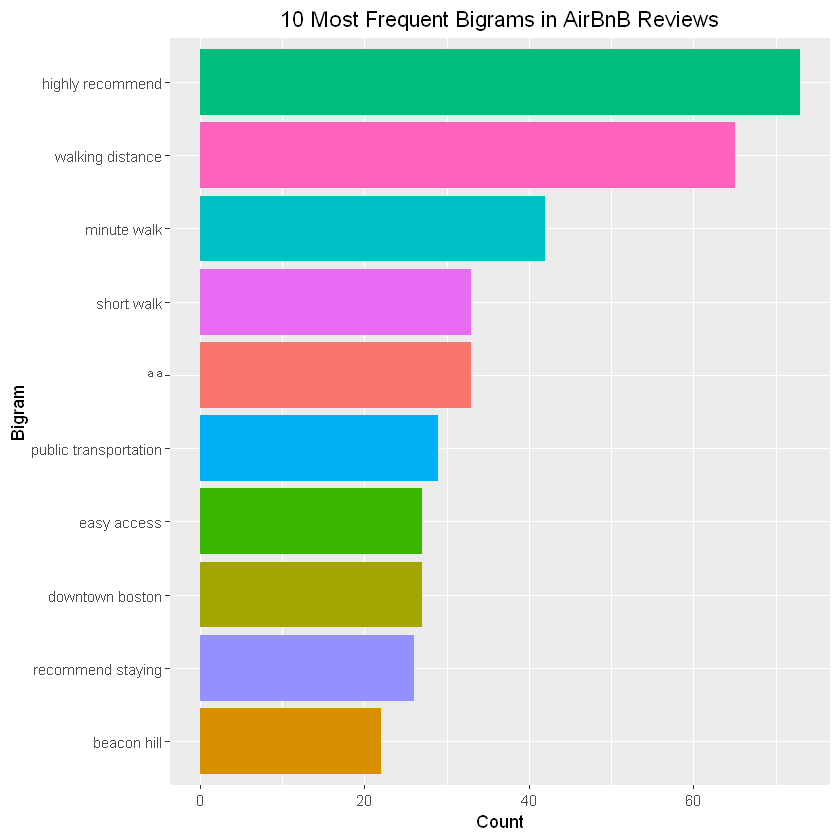

In [15]:
#create a barplot to illustrate top 10 bigrams
#reorder bigrams so the bars appear in descending order by frequency
ggplot(top10bigrams, aes(x=fct_reorder(word,n), y=n, fill=word))+
    geom_col(show.legend=FALSE)+
    coord_flip()+
    labs(title="10 Most Frequent Bigrams in AirBnB Reviews", y="Count", x="Bigram")

# Objective 3

**Create a wordcloud with the 25 most frequent words in the reviews data (excluding stop words)**

Based on the word cloud, it appears that the 25 most frequent words in the data after excluding stop words, in no particular order, are as what follows: "recommend", "apartment", "neighborhood", "boston", "experience", "friendly", "quiet", "city", "close", "night", "walk", "home", "most", "comfortable", "easy", "helpful", "location", "stay", "clean", "staying", "nice", "bed", "house", "time".

In [18]:
#count how many times each word in the airbnb reviews bag of words appears
#store as word_counts
#REMEMBER: clean_airbnb_reviews contains the tokenized + filtered out (stop words removed) version of bag of words
word_counts = clean_airbnb_reviews %>% count(word)
word_counts

word,n
0,1
0.5,1
00,2
1,21
1.5,2
10,48
100,9
10am,1
10m,1
10min,1


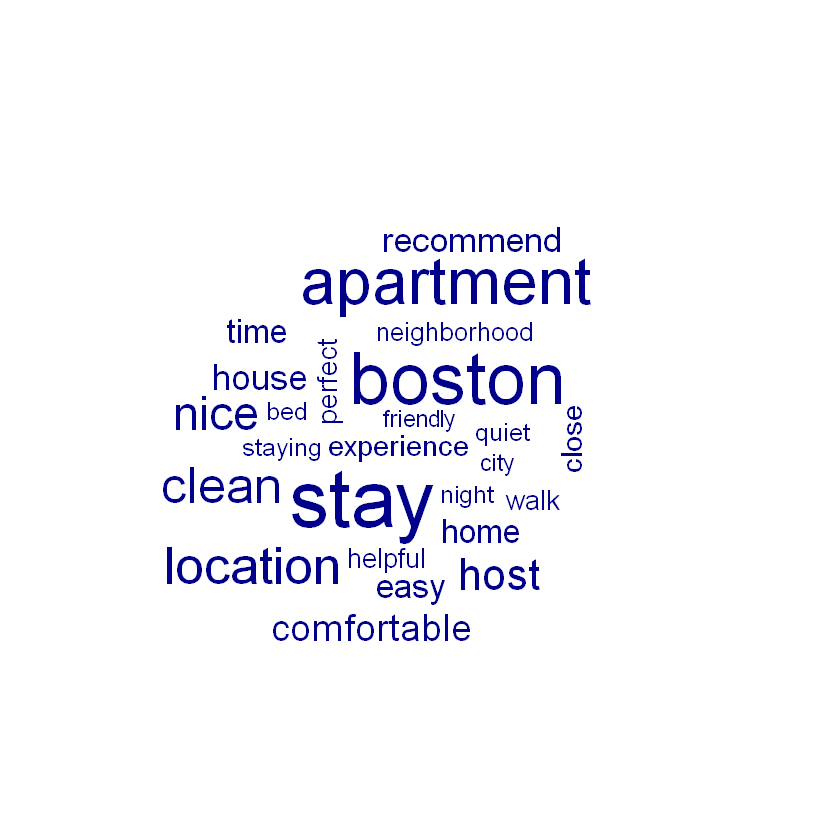

In [25]:
#create wordcloud of 25 most frequent words
wordcloud(
    words = word_counts$word,
    freq = word_counts$n,
    max.words = 25,
    colors = "darkblue"
)

# Objective 4

**What is the percentage of positive words in the whole dataset?**

It seems that positive words make up about 89% of the whole dataset.

In [29]:
#use "bing" sentiment dictionary since we want to attach "positive" or "negative" valuations to the sentiments of words
#inner join - or rather attach the sentiment valuations to the words that are also in the bing dictionary
words_sentiment = clean_airbnb_reviews %>% inner_join(get_sentiments("bing"))

Joining, by = "word"


In [137]:
#see percentage of positive words in the whole dataset 
percentage_vs = words_sentiment %>% count(sentiment) %>% mutate(percentage = 100*n/sum(n))
percentage_vs

sentiment,n,percentage
negative,584,10.98364
positive,4733,89.01636


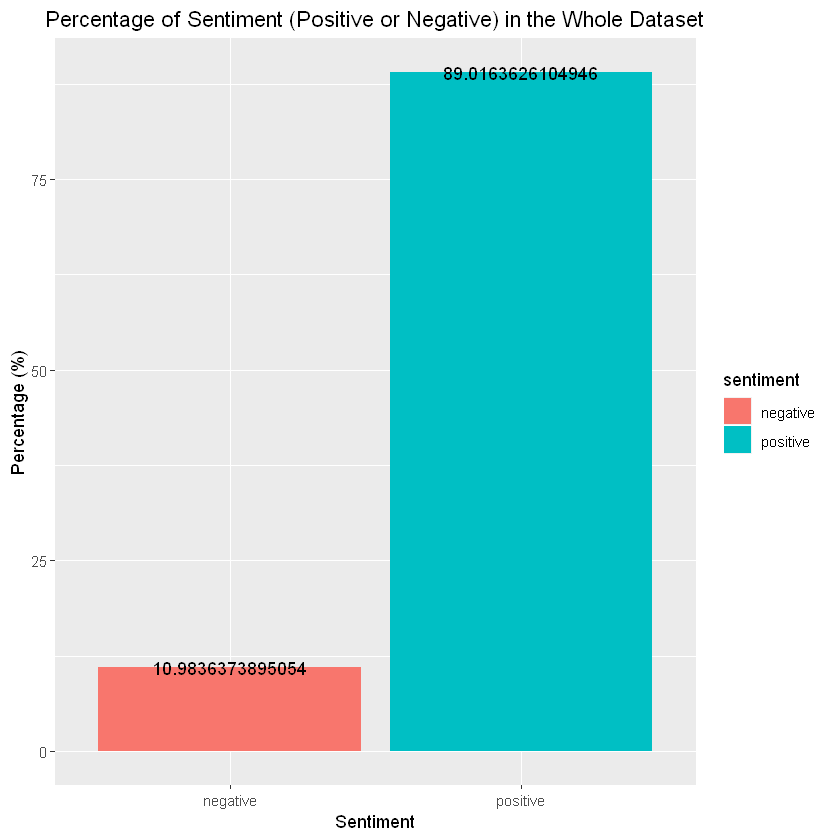

In [140]:
#visualize the output above
ggplot(percentage_vs, aes(sentiment,percentage, fill=sentiment))+
    geom_col()+
    labs(title="Percentage of Sentiment (Positive or Negative) in the Whole Dataset", x="Sentiment",y="Percentage (%)")+
    geom_text(aes(label=percentage))

# Objective 5

**What are the 5 most frequent positive words and the 5 most frequent negative words**

The 5 most frequent positive words were: "clean", "nice", "comfortable", "recommend", and "easy". On the other thand, the 5 most frequent negative words were: "issues", "noise", "hard", "issue", and "dirty".

In [38]:
#select the 5 most frequent positive and negative words
top_freq = words_sentiment %>% group_by(sentiment) %>% count(word) %>% top_n(5,n)
top_freq

sentiment,word,n
negative,dirty,14
negative,hard,19
negative,issue,17
negative,issues,21
negative,noise,20
positive,clean,346
positive,comfortable,237
positive,easy,202
positive,nice,314
positive,recommend,218


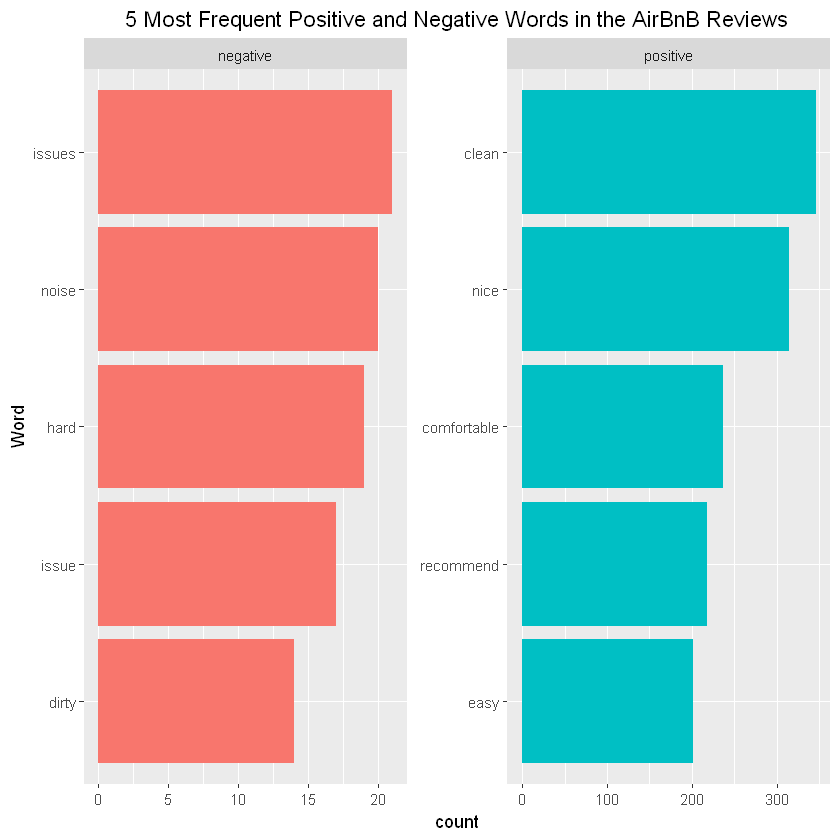

In [45]:
#create plot showing 5 most frequent positive and negative words, faceted by sentiment arranged in desc order
ggplot(top_freq, aes(x=fct_reorder(word,n), y=n, fill=sentiment))+
    geom_col(show.legend=FALSE)+
    facet_wrap(~sentiment, scales ="free")+
    coord_flip()+
    labs(title="5 Most Frequent Positive and Negative Words in the AirBnB Reviews", x="Word", y="count")

# Objective 6
- **Are most of the reviews on short-term Airbnb rentals in the Boston area generally positive or negative?**

    According to the scatter plot that I made that illustrates the percentage of positive words for each review, if we set an arbitrary threshold of 50%, meaning that we would equate a review as "positive" if the percentage of positive words is greater than 50% and the opposite of this being "negative", it appears that most of the reviews are positive. This is because the majority of the reviews are concentrated above the said arbitrary 50% threshold.
    
    Additionally, I found the average percentage of positive words by review to be 73.0029049350302% - which is roughly 73%. 
    
- **Are the 5 least positive reviews actually negative or not?**

    After reading through the 5 most and least positive reviews - excluding the reviews that were either 0% or 100% positive -it seems that the 5 least positive reviews are actually negative. This is due to the fact that when you evaluate the 5 least positive reviews holistically, these said reviews are actually complaints made by disgruntled customers stemming from the poor experience with their airbnb due to the abyssmal service provided by the airbnb staff. Some of the grievances include how the airbnb was overpriced, unsanitary, unsafe, mediocre at best, and unprofessional all around.

In [63]:
#create a document-term matrix out of the airbnb reviews (with stop-words removed)
dtm_review = words_sentiment %>% count(word,id) %>% cast_dtm(id, word, n) %>% as.matrix()
str(dtm_review)

 num [1:953, 1:623] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ Docs : chr [1:953] "63" "79" "108" "113" ...
  ..$ Terms: chr [1:623] "accessible" "accomplishments" "accurate" "accurately" ...


In [88]:
#find percentage of positive words in each review, excluding reviews that equal to 0 or 100% positive
#store into perc_positive_byid
perc_positive_byid = words_sentiment %>% 
    group_by(id) %>% 
    count(sentiment) %>% 
    mutate(perc_positive=100*n/sum(n)) %>% 
    select(-n) %>% 
    filter(sentiment == "positive") %>%
    filter(between(perc_positive,1,99))

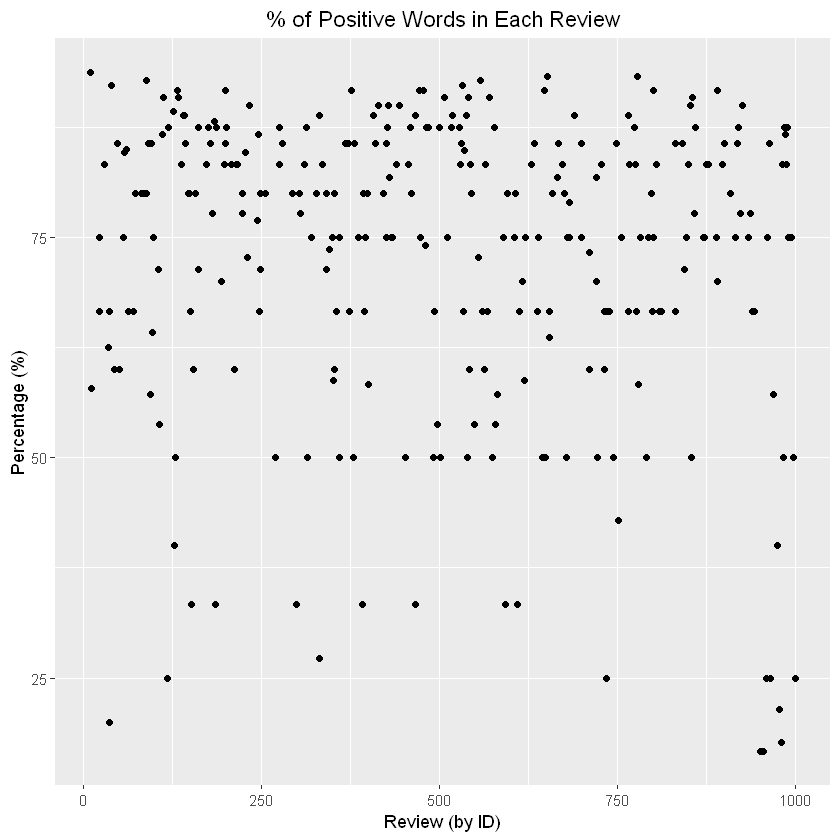

In [141]:
#plot percentages of positive words -- this is after the 0 and 100% positive reviews were removed
ggplot(perc_positive_byid, aes(x=id, y=perc_positive))+
    geom_point(show.legend=FALSE)+
    labs(title="% of Positive Words in Each Review", x="Review (by ID)", y="Percentage (%)")

In [103]:
#average percentage of positive words by review
mean(perc_positive_byid$perc_positive)

[1] 73.0029

In [122]:
#sort positive reviews by percentage of positive words in descending order
arranged_posreview = perc_positive_byid %>% arrange(desc(perc_positive))

In [126]:
#find 5 most positive reviews -- excluding reviews that are 0% and 100% positive
top5_posreview=arranged_posreview[1:5,]
top5_posreview

id,sentiment,perc_positive
10,positive,93.75000
651,positive,93.33333
778,positive,93.33333
88,positive,92.85714
557,positive,92.85714


In [127]:
#find 5 least positive reviews -- excluding reviews that are 0% and 100% positive
least5_posreview=tail(arranged_posreview, 5)
least5_posreview

id,sentiment,perc_positive
977,positive,21.42857
36,positive,20.00000
980,positive,17.64706
950,positive,16.66667
955,positive,16.66667


In [133]:
#5 most positive reviews
airbnb_data %>% inner_join(top5_posreview, by="id")

id,comments,sentiment,perc_positive
10,"Shelley was so nice and helpful. I could tell that this wasn't her first rodeo when it comes to renting out her space. She was really well prepared for guests and ready/willing to answer any questions we had. I also really enjoyed her sweet cats. The tiger/grey one was so sweet, almost dog-like. The room was cozy and comfy, there were an ample amount of fresh towels, and the water pressure in the shower was really nice. I would equate the neighborhood to Crown Heights/East Flatbush in Brooklyn -- not as clean as Brooklyn Heights, but not particularly dangerous. Easy access to the T. Cute, old home that I would highly recommend to friends.",positive,93.75000
88,"I felt so lucky that I had chosen Duane's place every day of the two weeks I stayed at his place. From before I came till after I had left Duane was the most helpful host I could ever imagine, making my stay in Boston so much easier and more fun. I also felt at home at his place right away, hanging in his lovely sofa everyday after a long day. Everyday would start with his friendly question if I was ready for coffee and home baked bread and I would sit and look out his window looking at the beatiful view out at Boston from his window enjoying my breakfast greatly. With Duane's interest in how I was doing and all his help we became friends and I will remember my stay at Duane's as a wonderful thing about Boston. Also don't worry about the transportation into downtown, I stayed at Duane's place for almost two weeks and went into downtown everyday and it was really no problem. One last thing.. I always felt secure in the neighborhood, it was a cozy area. I would choose Duane's place if I should ever come back to Boston and I would highly recommend Staying at Duane's to anybody going to Boston. The bottom line is that I would wish that a review like this could express how happy I was about staying at Duane's.",positive,92.85714
557,"Our hosts (Richard and Victoria) made us feel very welcome. They left detailed instructions for our stay, answered any questions we had, and even left 2 bottles of wine for us to enjoy with our holiday dinners; such a thoughtful touch! They were just awesome; they kept in touch (via text messaging) to make sure that we were enjoying our stay and let us know they were available to immediately address any issue that may arise. The apartment was even better in person - super cute, clean, and comfy! It was also bigger than we thought it would be, with enough room for the 3 of us (me, my husband, and our adult son) to spend time together, but also for each of us to have our own space if desired. The apt had all the described amenities (2 flat-screen TVs, wireless internet, a fully-supplied kitchen, etc.). We all slept well; the beds were big, soft, and warm. The neighborhood was nice, very quiet with a suburban feel. This was our first experience with airbnb, and the bar has been set very high indeed! This was sooo much better than staying in a hotel. The apartment was absolutely perfect - literally a home away from home. We would stay there again in a heartbeat.",positive,92.85714
651,"Jessica's enchanting Oasis was even better than expected. The photos are beautiful but reality does not do them justice, you really have to be there. The beds were super comfortable, the house very clean (smells amazing!). Jessica has a talent for interior decorating. Her carriage house is a warm and welcoming place to relax after touring the sites. Waking up to a yummy breakfast and gourmet coffee tops the list; especially when you can enjoy it on her sunny terrace. The location was perfect. It was easy to get around in order to visit all the hot spots in Boston. A 10 minute walk to the T train red line which will take you everywhere you want to go. It was everything we were looking for and more.",positive,93.33333
778,"My husband and I were booked to arrive at Marguerite's the very day after the shoot-out with the Boston Marat

In [135]:
#5 least positive reviews
airbnb_data %>% inner_join(least5_posreview, by="id")

id,comments,sentiment,perc_positive
36,"You get what you pay for and you don't pay much for this place. It is like a hostel, with several single rooms and shared bathroom. Clean, but not much else. Bed and table are shaky. Good if you're on a tight budget and just need a cheap place to crash for a night. They're strict about check-out times.",positive,20.00000
950,"We were rather disappointed with this accommodatiion. The host did not even meet us, but left rather complicated instructions to access the keys to the apartment. We did not meet the host at all during our stay, or even hear from him as to how we were getting on. The apartment was somewhat shabby, and not really like the image indicated, as this only showed a small corner of one room. The kitchen was tiny, and although quite well equipped, it badly needed redecoration and a good clean. In addition, the apartment backed onto a yard with three dumpsters, and on 4 occasions we were awakened early in the morning by the noise of the dumpsters being emptied.",positive,16.66667
955,"disgusting, disappointed, dirty. The two matress were disgusting and uncomfortable. The bathroom I can't explain it. In the fridge was some old food. Before we arrive we inform Sean that we would like to use the two beds. When we arrive, we dont find sheets for the seconf bed and we ask Sean what can we do, and he say we can go to find him somewhere and he can give us all what we need. This is service? The idea of Airbnb is ""feel like at home"", but here I can only say ""better go to the hostel/hotel"". I can't recommend it. If you read the comments from other peolple you find that a lot of them say the same like me.",positive,16.66667
977,"This was the first time I've left a rental midway through a trip. I left and paid MORE to stay in a hotel. I wish I would have seen the most recent review at the time I booked this place (the review posted very recently and I book a couple months ago), because I never would have booked the stay. Everything in the previous review by Gang is 100 percent accurate. Bare in mind this language barrier, he's speaking to the sounds the heater made rather than the AC. The heater made incredibly loud and awful sounds all night long. While I'm grateful it was turned on, I couldn't sleep at all because of the rattling and shrieking coming from the baseboard unit right next to the bed and in the nearby kitchen. Also, the lighting is completely off in the photos provided. The space is very dark. Additionally, there was salt from the recent snow tracked through the entire place and a bag of dirty laundry by the door. I was very uncomfortable with the idea that someone/a company was coming by to pick up this dirty laundry while I was there. I ended up carrying all of my luggage with me to a conference because I had no idea who had the keypad code to this place. The bed is terribly uncomfortable and, for the current temperatures of 10 degrees at night, there is insufficient bedding available. You're told specifically in the host instructions not to take any additionally bedding from the closet... despite the THIN ""comforter"" provided. The bed is no better than a pull-out couch with a metal bar in your back. I was so uncomfortable and unhappy with this listing, I stayed one night and left the next day for a hotel. I paid TWICE because I didn't want to stay there.",positive,21.42857
980,"Michelle seemed like a lovely woman and I can see why people would enjoy her company. However I felt as though there was a discrepancy with the photos of the room and the actual room. The room was extremely dusty and dirty despite Michelle saying that the place is ""professionally cleaned"". I found quite a few dead bugs in the room that should've been cleaned up. There was also a lot of flies, spiders, and centipedes in the room. The sink and the tub was constantly plugged and the water would always fill up even as I was just brushing my teeth. There were brown stains on the bottom of the 